In [13]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [17]:
# Load the data
file_path = '/Users/niks/Desktop/USDA/Spring 2024/Data/2021_hyperspectral/20210714_FirstDay..txt'
df = pd.read_csv(file_path, delimiter='\t', skiprows=0, header=None)


# Set the DataFrame columns to the first row and then drop the first row
df.columns = df.iloc[0]
df = df.iloc[1:]

/var/folders/t1/32t4l2vs0rz466xwy0jgvx600000gn/T/ipykernel_41427/2487064945.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,2

In [18]:
import pandas as pd

# Assuming df is your DataFrame loaded with the data

# Step 1: Find all columns related to Plot 212 and mistakenly labeled Plant 2
plot_212_columns = [col for col in df.columns if 'N212' in col and 'P2' in col]

# Since we know that each plant has 30 readings and it's the last 30 that are mislabeled,
# we identify these columns by their order (assuming they are in the correct order in the DataFrame)
# and rename them to Plant 3.
mislabelled_columns = plot_212_columns[-30:]  # Get the last 30 columns for correction

# Step 2: Rename these columns to reflect Plant 3 instead of Plant 2
corrected_columns = {old_name: old_name.replace('P2', 'P3') for old_name in mislabelled_columns}

# Apply the renaming to the DataFrame
df.rename(columns=corrected_columns, inplace=True)

# Now df should have the corrected column names for Plot 212's Plant 3 readings.


In [20]:


# Reset the DataFrame index
df.reset_index(drop=True, inplace=True)

# Define a function to extract plot IDs
def extract_plot_id(column_name):
    match = re.match(r"N(\d+)P", column_name)
    if match:
        return match.group(1)  # Returns the plot identifier
    else:
        return None

# Initialize a dictionary to hold plot groups
plot_groups = {}

# Iterate over the column names to group them by plot ID
for column in df.columns:
    plot_id = extract_plot_id(column)
    if plot_id:
        if plot_id not in plot_groups:
            plot_groups[plot_id] = [column]
        else:
            plot_groups[plot_id].append(column)

# At this point, plot_groups dictionary contains groups of columns by their plot IDs
print(plot_groups)

# To demonstrate how you might use this, let's print the number of columns associated with each plot ID
for plot_id, columns in plot_groups.items():
    print(f"Plot ID {plot_id} has {len(columns)} columns.")


{'2112': ['N2112P100000.asd', 'N2112P100001.asd', 'N2112P100002.asd', 'N2112P100003.asd', 'N2112P100004.asd', 'N2112P100005.asd', 'N2112P100006.asd', 'N2112P100007.asd', 'N2112P100008.asd', 'N2112P100009.asd', 'N2112P100010.asd', 'N2112P100011.asd', 'N2112P100012.asd', 'N2112P100013.asd', 'N2112P100014.asd', 'N2112P100015.asd', 'N2112P100016.asd', 'N2112P100017.asd', 'N2112P100018.asd', 'N2112P100019.asd', 'N2112P100020.asd', 'N2112P100021.asd', 'N2112P100022.asd', 'N2112P100023.asd', 'N2112P100024.asd', 'N2112P100025.asd', 'N2112P100026.asd', 'N2112P100027.asd', 'N2112P100028.asd', 'N2112P100029.asd', 'N2112P200000.asd', 'N2112P200001.asd', 'N2112P200002.asd', 'N2112P200003.asd', 'N2112P200004.asd', 'N2112P200005.asd', 'N2112P200006.asd', 'N2112P200007.asd', 'N2112P200008.asd', 'N2112P200009.asd', 'N2112P200010.asd', 'N2112P200011.asd', 'N2112P200012.asd', 'N2112P200013.asd', 'N2112P200014.asd', 'N2112P200015.asd', 'N2112P200016.asd', 'N2112P200017.asd', 'N2112P200018.asd', 'N2112P200

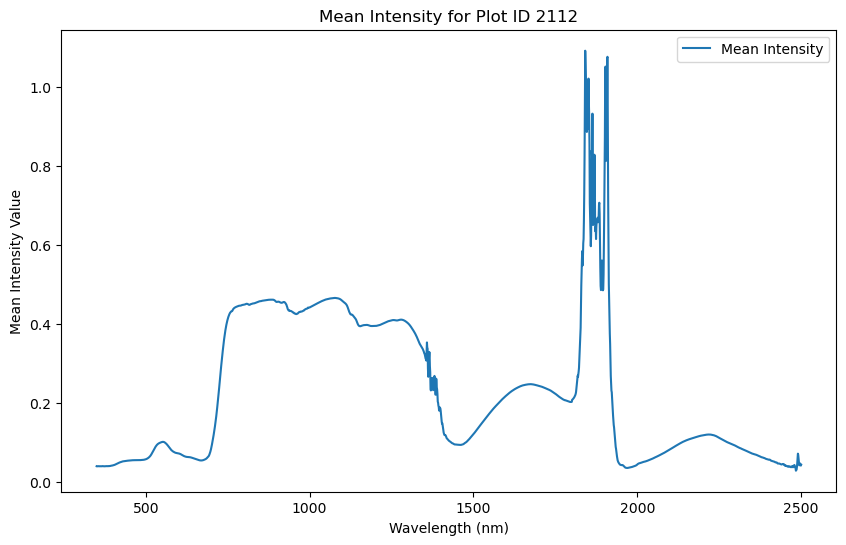

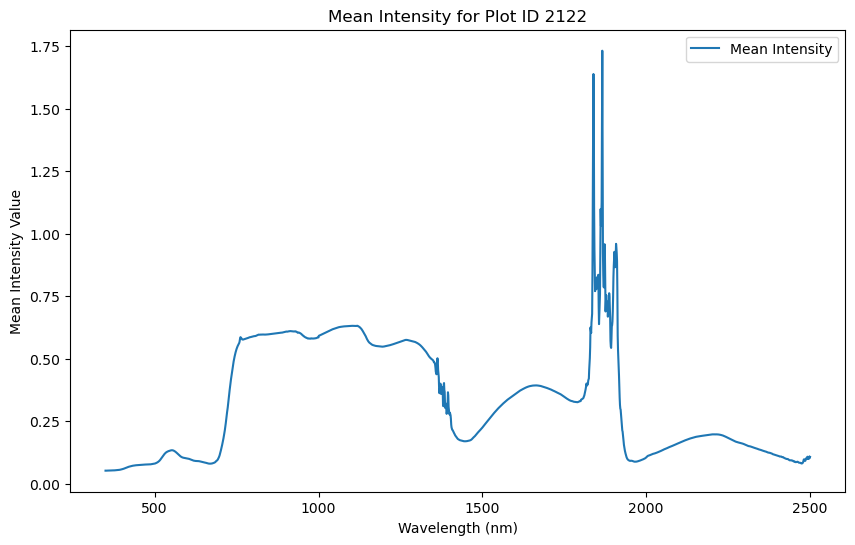

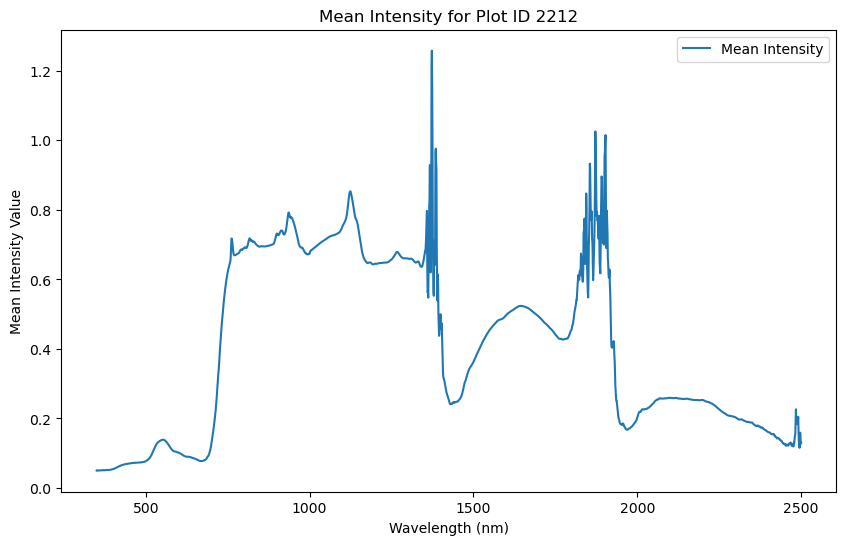

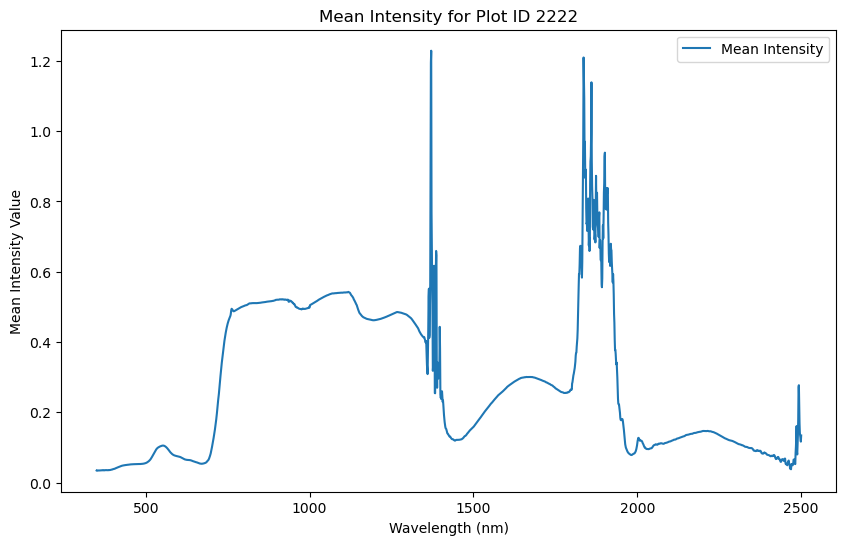

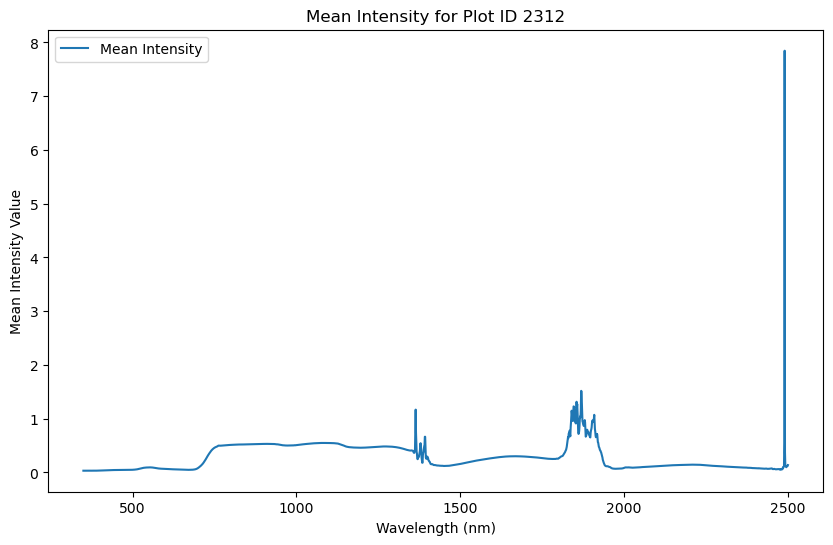

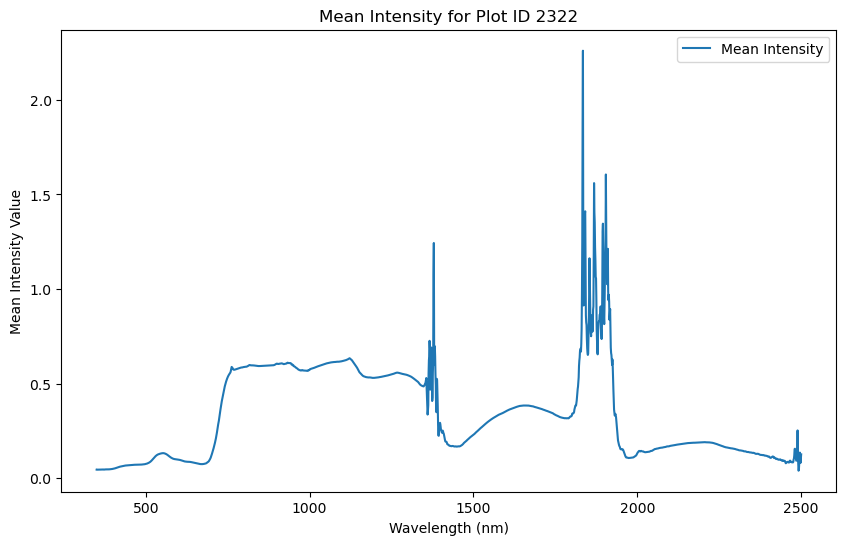

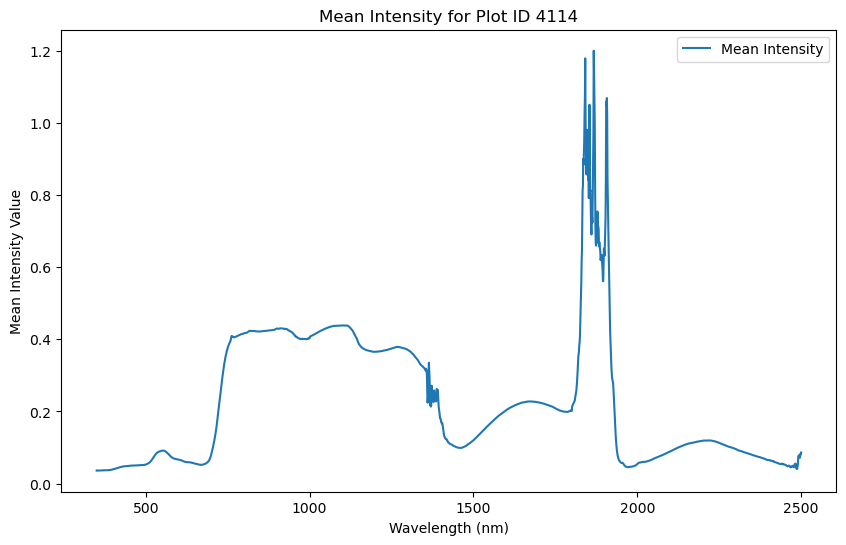

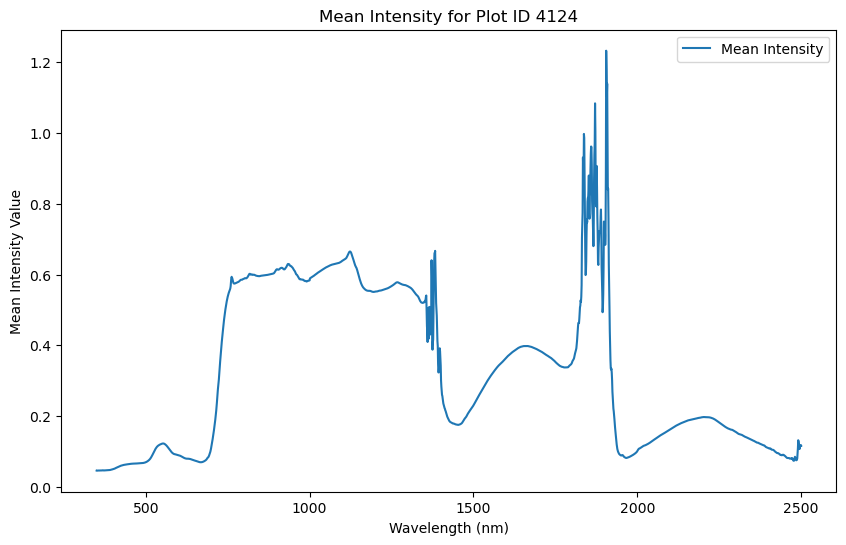

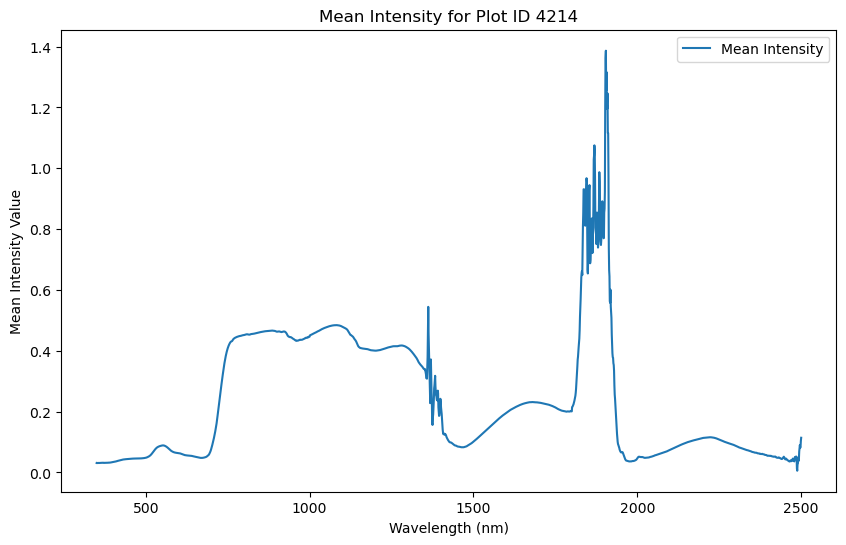

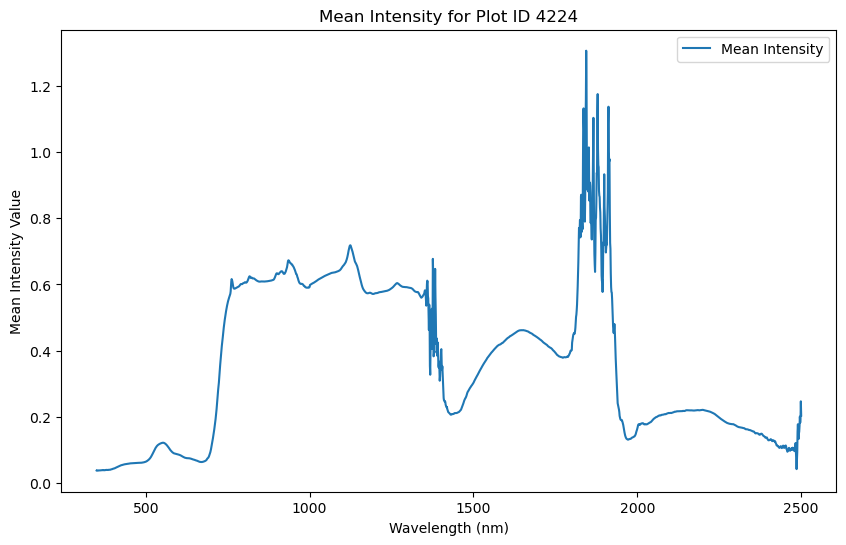

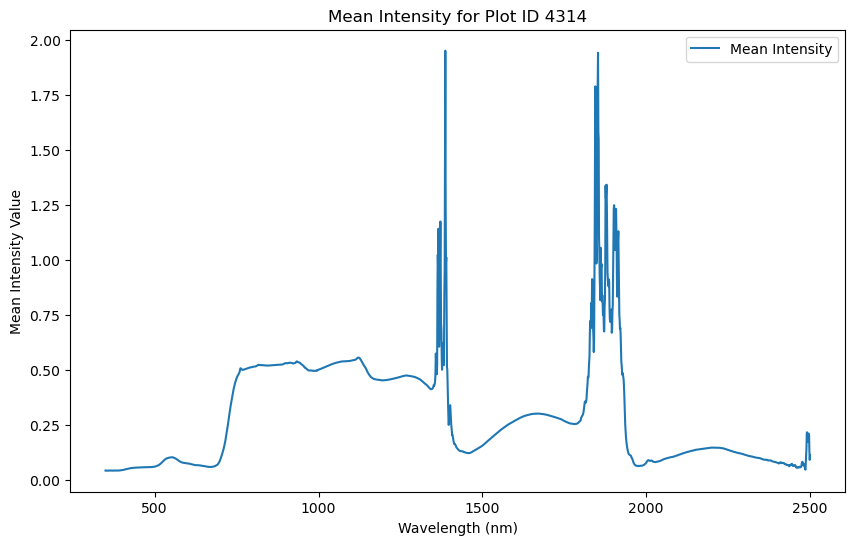

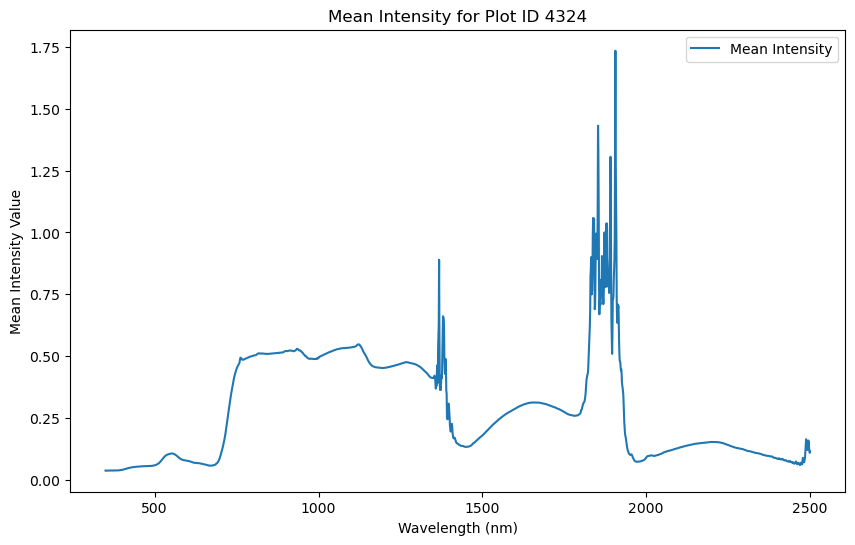

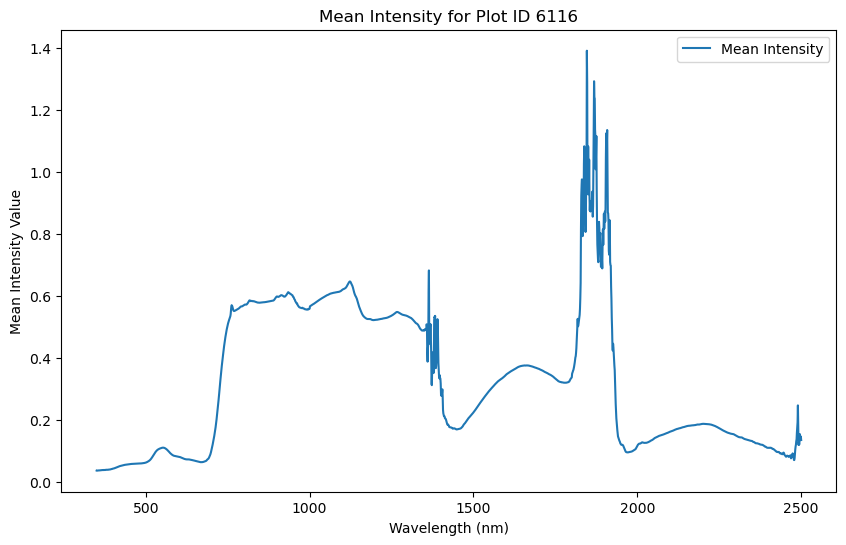

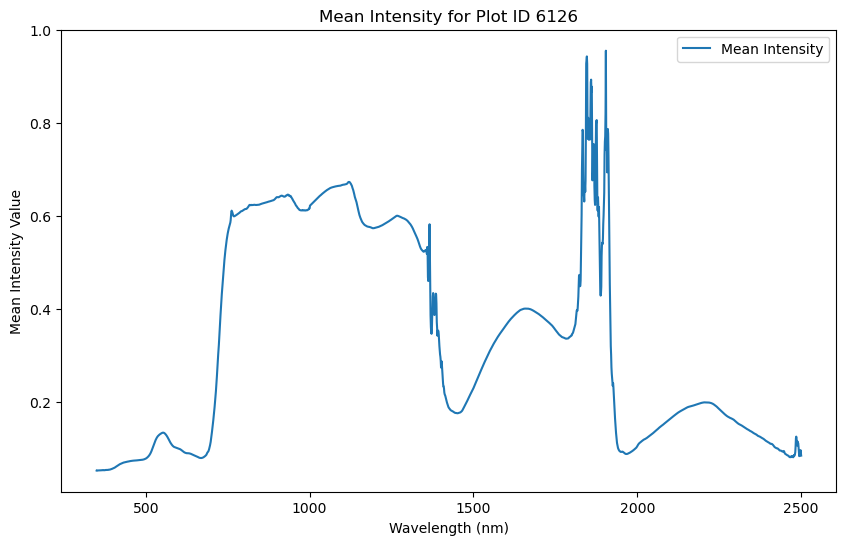

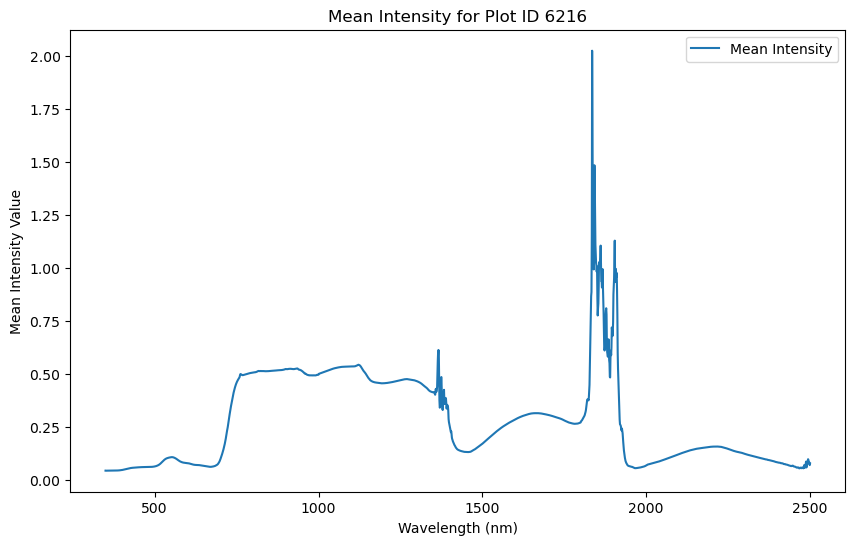

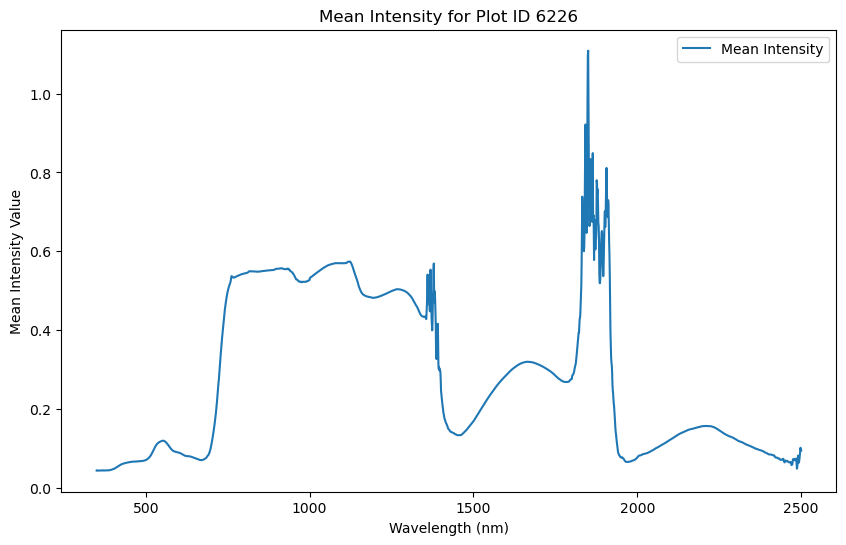

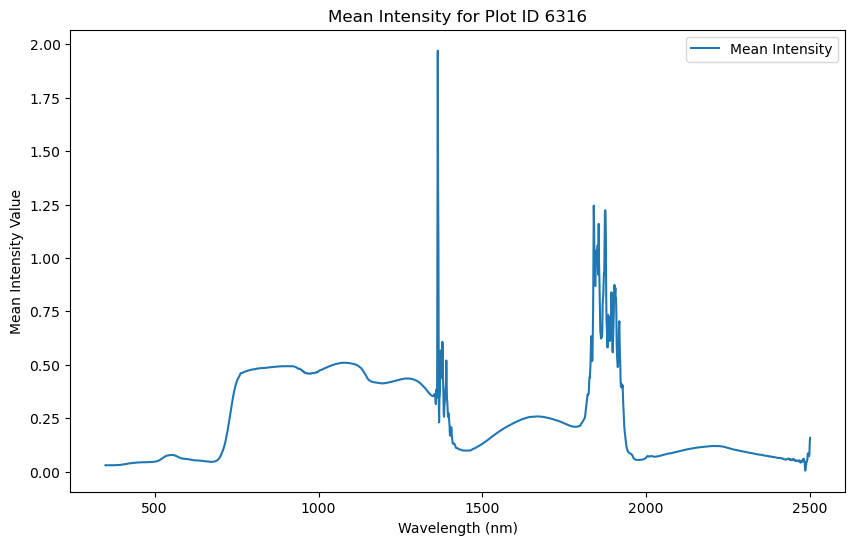

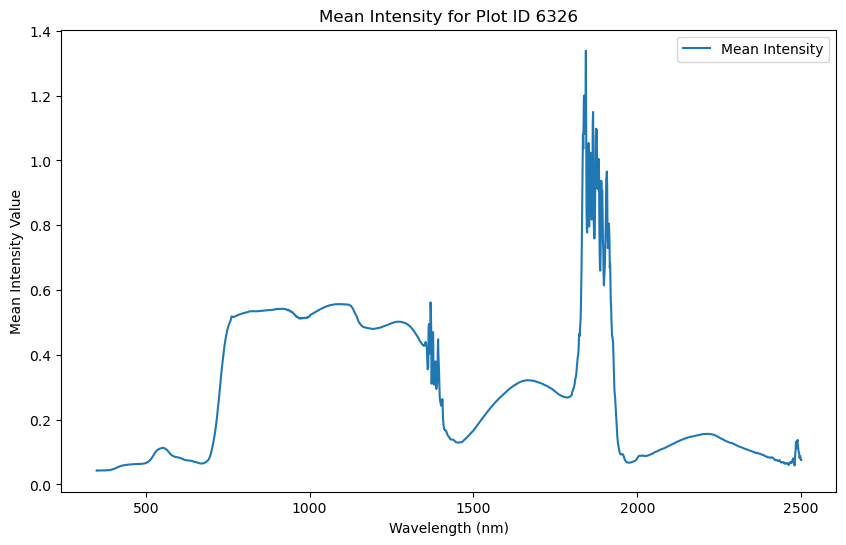

In [32]:
import matplotlib.pyplot as plt

# Ensure the DataFrame is in the correct numeric format
df = df.apply(pd.to_numeric, errors='ignore')

for plot_id, columns in filtered_plot_groups.items():
    # Calculate the mean across the columns for this plot ID
    mean_values = df[columns].mean(axis=1)

    # Create a new figure for each plot ID
    plt.figure(figsize=(10, 6))

    # Plot the mean values. If your DataFrame includes a 'Wavelength' column, use it as the x-axis.
    if 'Wavelength' in df.columns:
        plt.plot(df['Wavelength'], mean_values, label=f'Mean Intensity')
        plt.xlabel('Wavelength (nm)')
    else:
        plt.plot(mean_values, label=f'Plot ID {plot_id}')
        plt.xlabel('Sample Index')
    
    plt.ylabel('Mean Intensity Value')
    plt.title(f'Mean Intensity for Plot ID {plot_id}')
    plt.legend()
    plt.show()


In [29]:
# Convert data to numeric, ignoring errors for non-numeric data
df = df.apply(pd.to_numeric, errors='ignore')

# Find the index for the row corresponding to 770 nm wavelength
wavelength_770_index = df[df['Wavelength'] == 770].index[0]

# Dictionary to keep track of how many columns are filtered out per group
filtered_columns_count = {}

# New dictionary for filtered plot groups
filtered_plot_groups = {}

for plot_id, columns in plot_groups.items():
    # Filter columns based on intensity value at 770 nm
    filtered_columns = [col for col in columns if df.at[wavelength_770_index, col] >= 0.3]
    
    # Note how many columns are filtered out
    filtered_columns_count[plot_id] = len(columns) - len(filtered_columns)
    
    # Update the plot groups with filtered columns
    filtered_plot_groups[plot_id] = filtered_columns

# Print out the count of filtered columns per plot group
for plot_id, count in filtered_columns_count.items():
    print(f"Plot ID {plot_id}: {count} columns filtered out.")

# filtered_plot_groups now contains the columns that meet the criteria per plot group


Plot ID 2112: 17 columns filtered out.
Plot ID 2122: 0 columns filtered out.
Plot ID 2212: 0 columns filtered out.
Plot ID 2222: 1 columns filtered out.
Plot ID 2312: 0 columns filtered out.
Plot ID 2322: 0 columns filtered out.
Plot ID 4114: 20 columns filtered out.
Plot ID 4124: 0 columns filtered out.
Plot ID 4214: 3 columns filtered out.
Plot ID 4224: 0 columns filtered out.
Plot ID 4314: 0 columns filtered out.
Plot ID 4324: 5 columns filtered out.
Plot ID 6116: 0 columns filtered out.
Plot ID 6126: 0 columns filtered out.
Plot ID 6216: 2 columns filtered out.
Plot ID 6226: 0 columns filtered out.
Plot ID 6316: 0 columns filtered out.
Plot ID 6326: 0 columns filtered out.


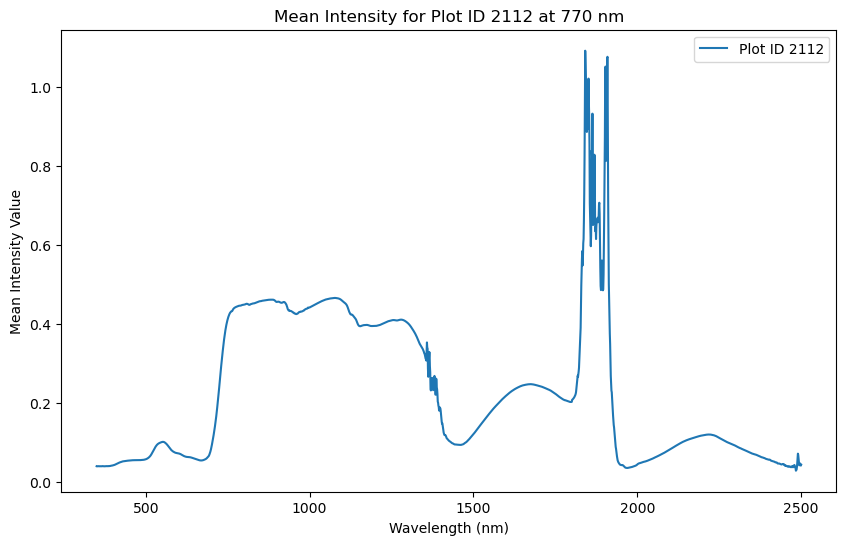

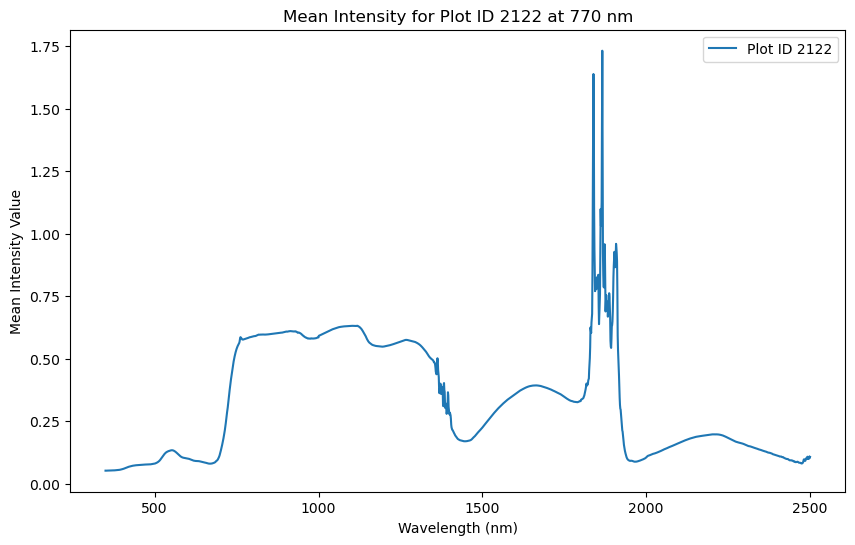

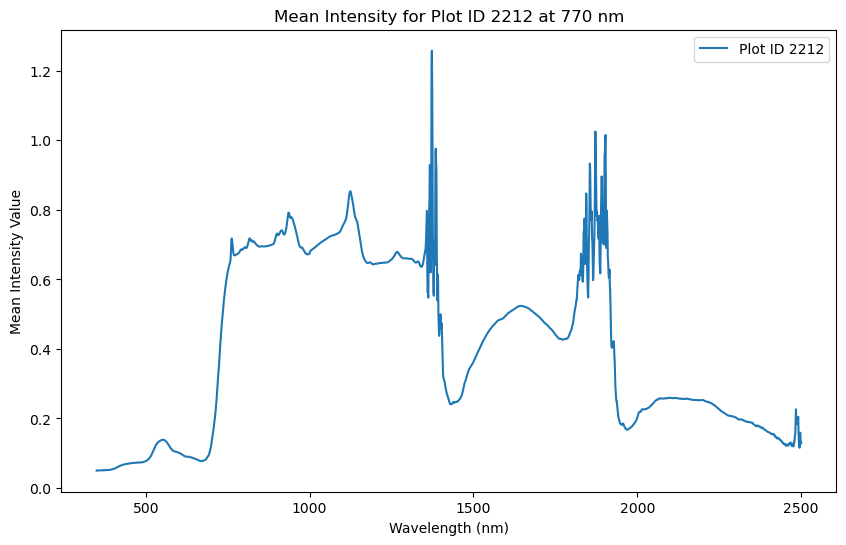

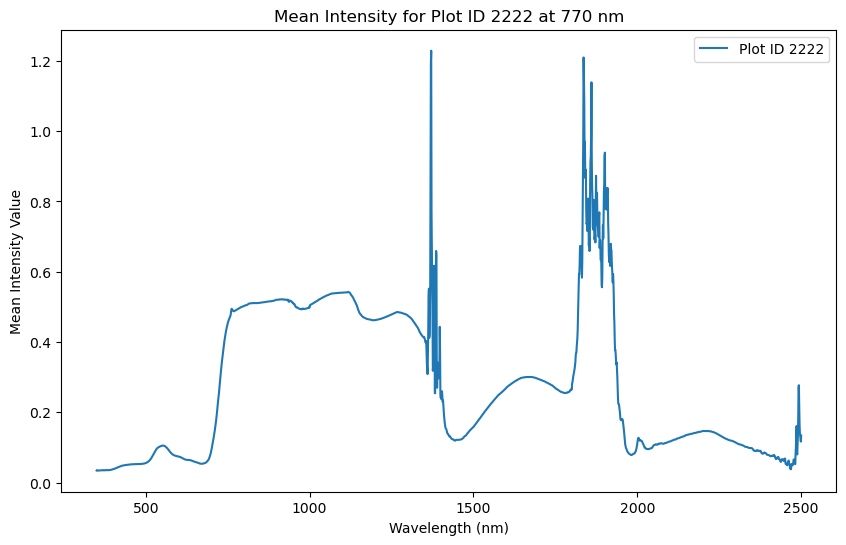

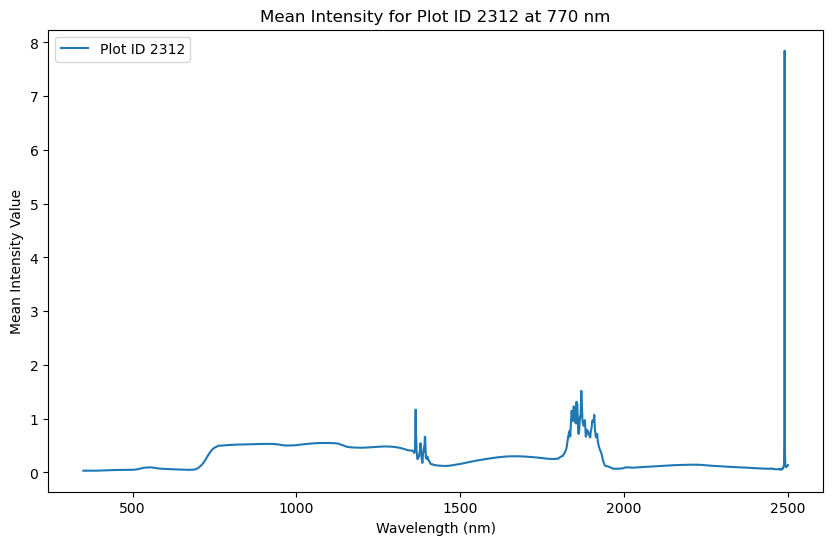

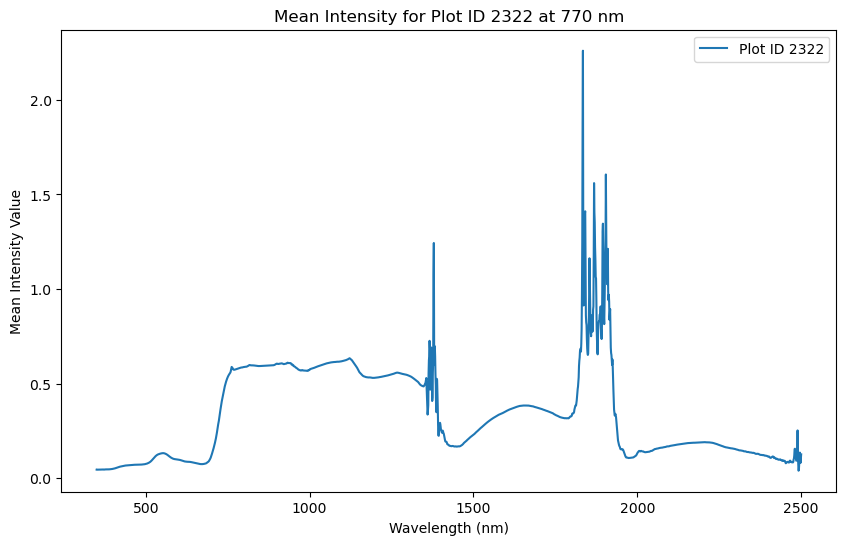

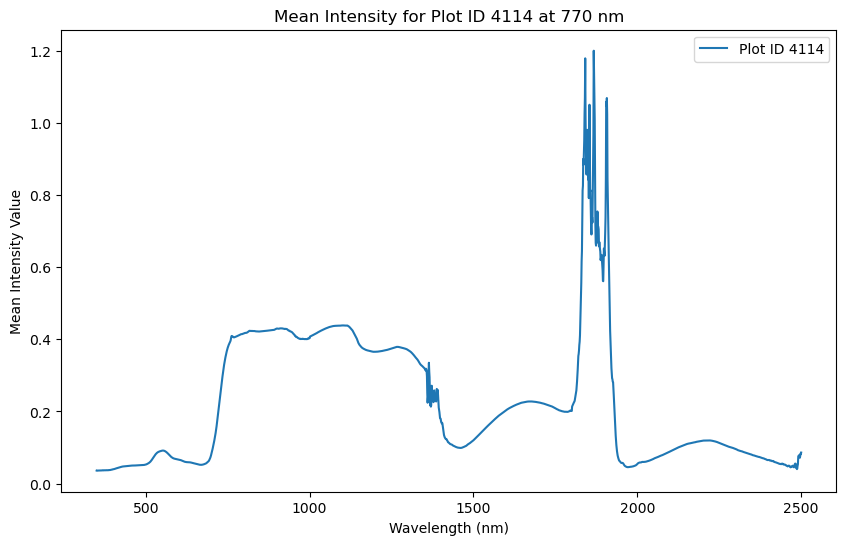

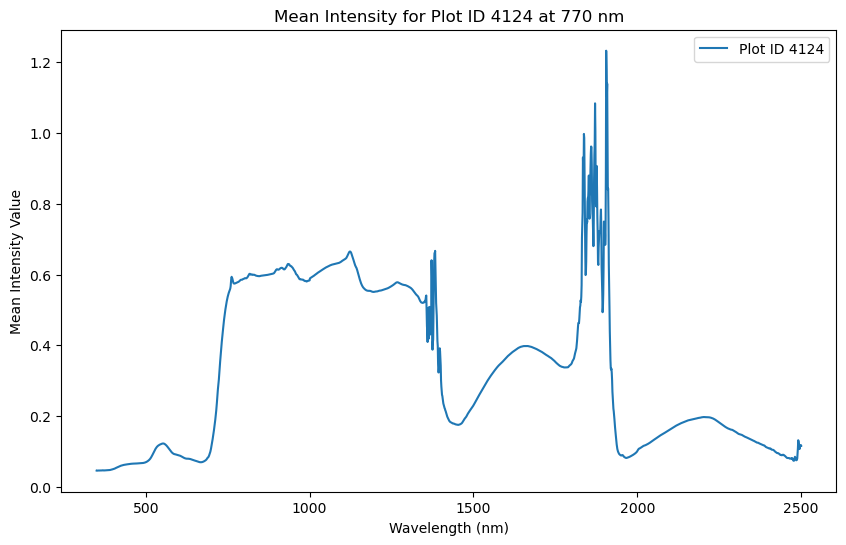

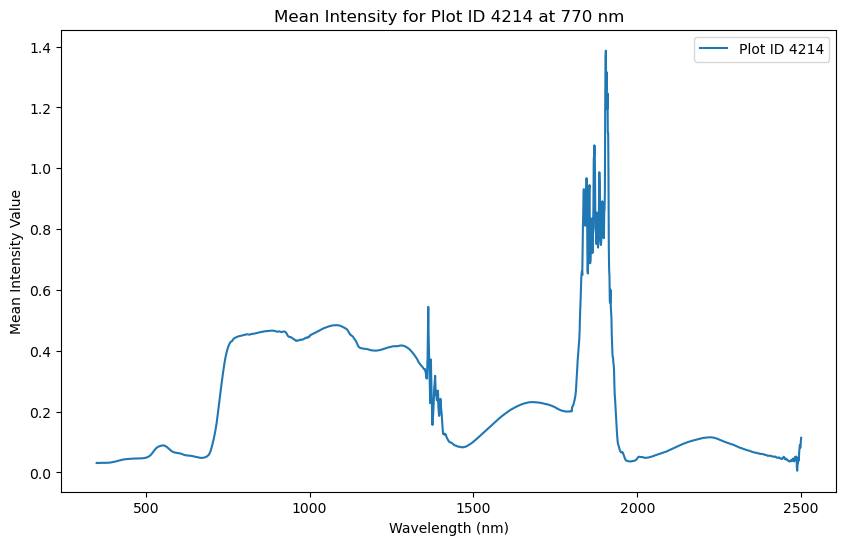

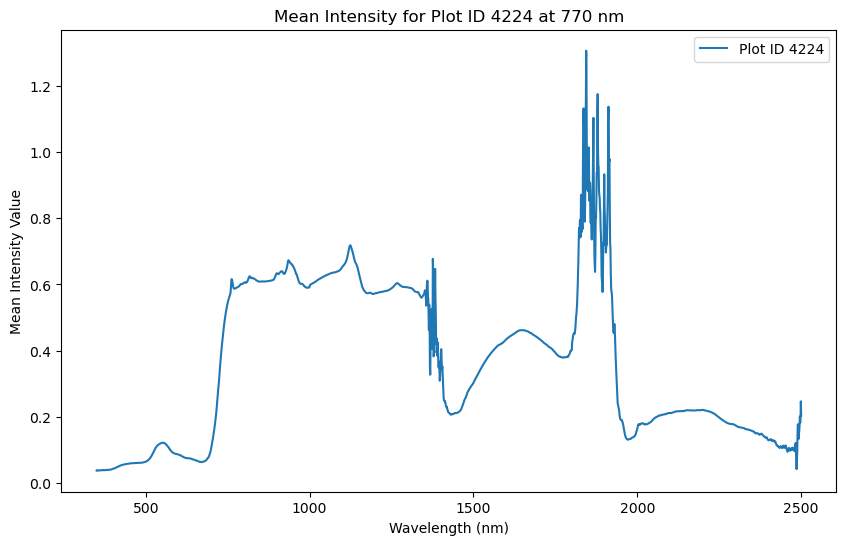

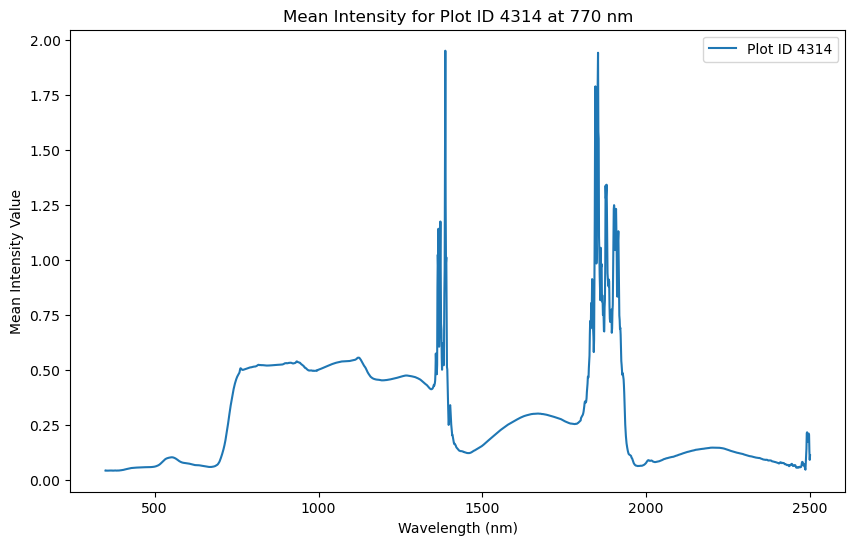

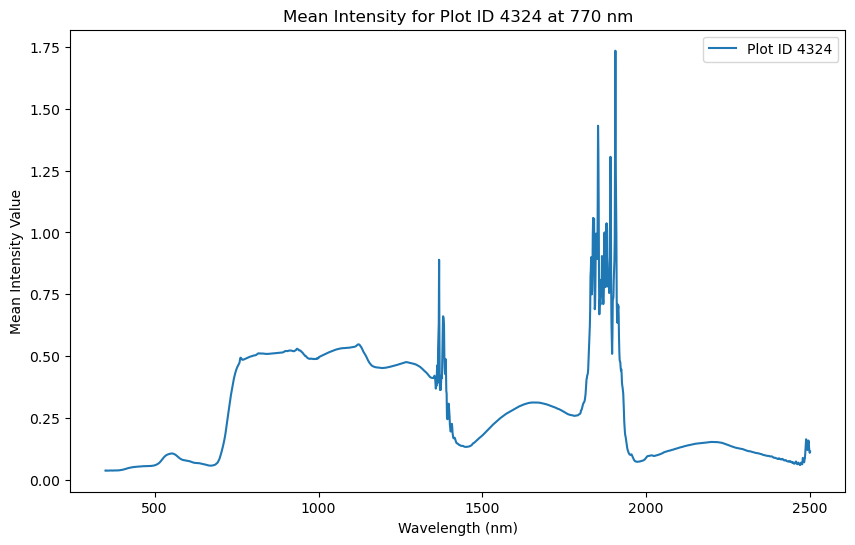

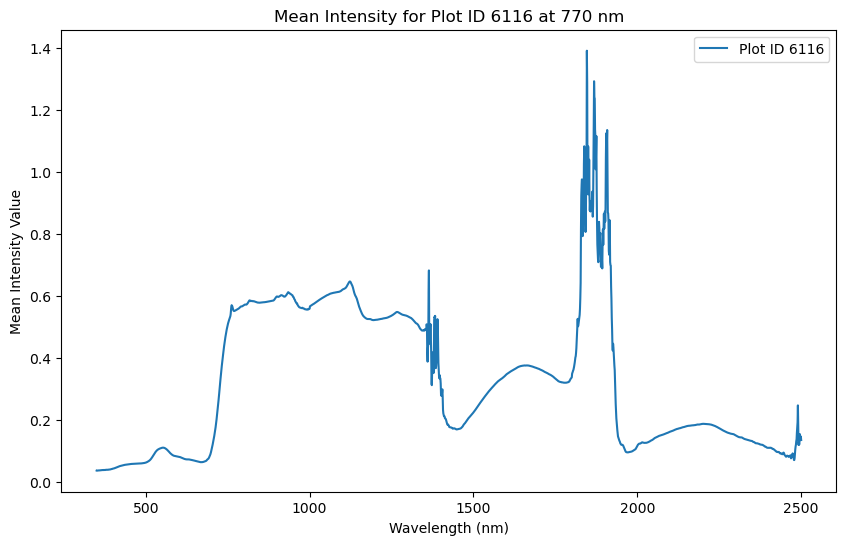

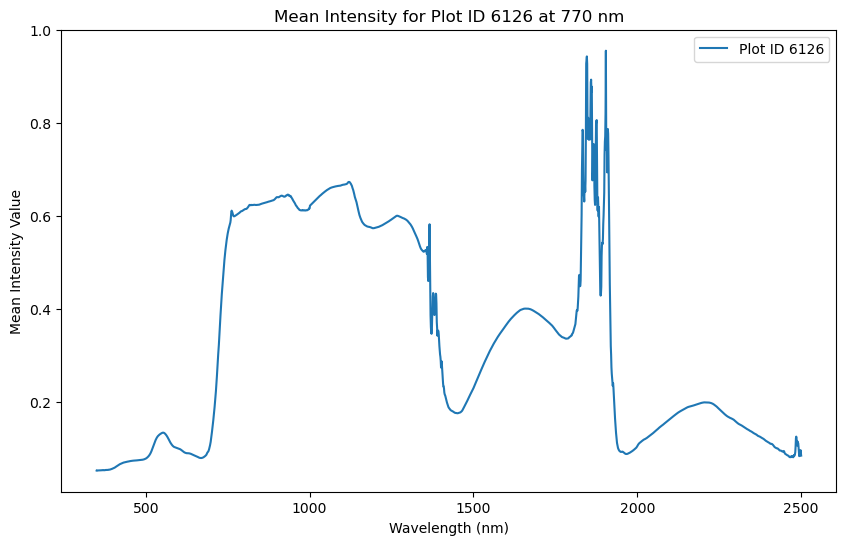

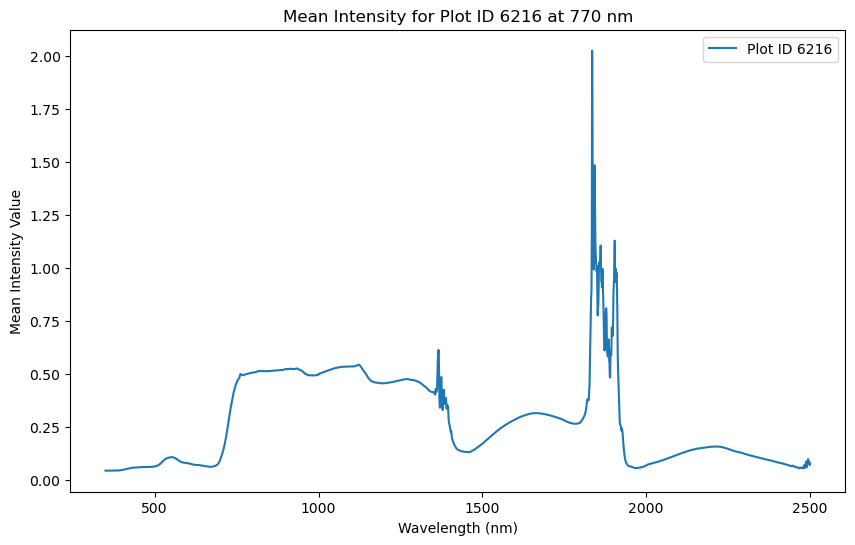

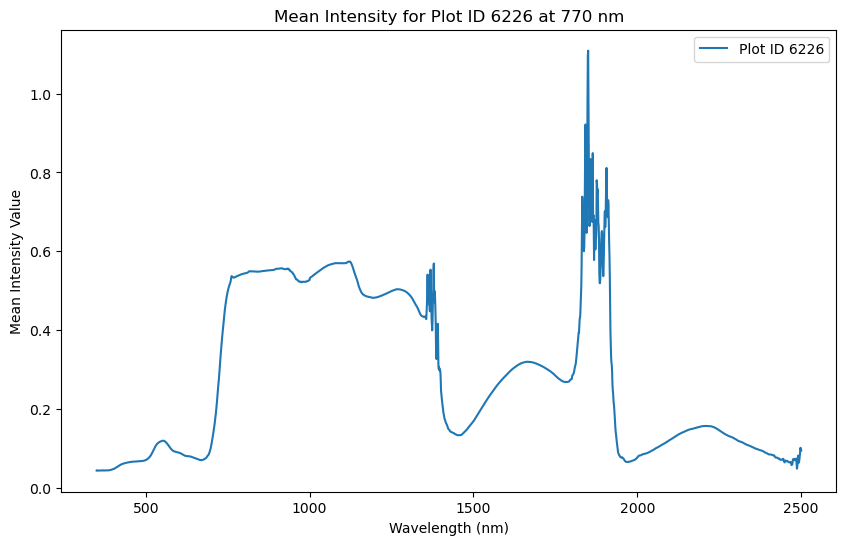

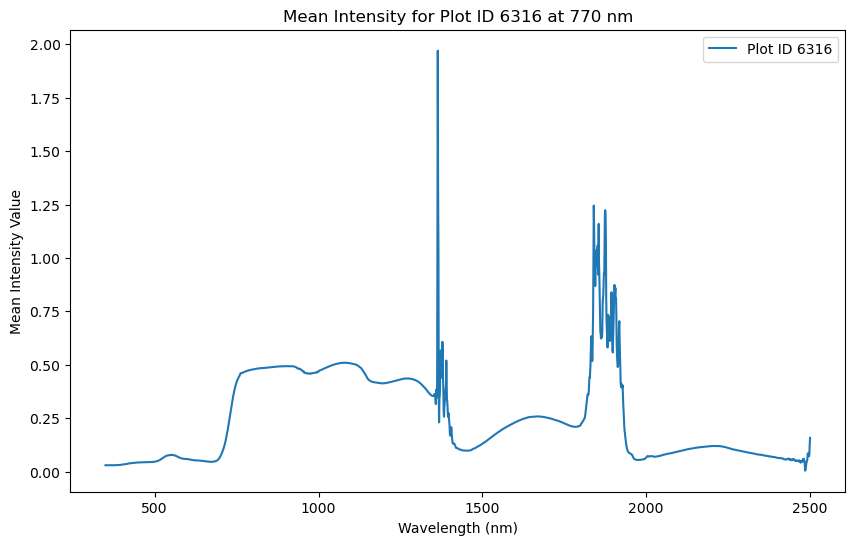

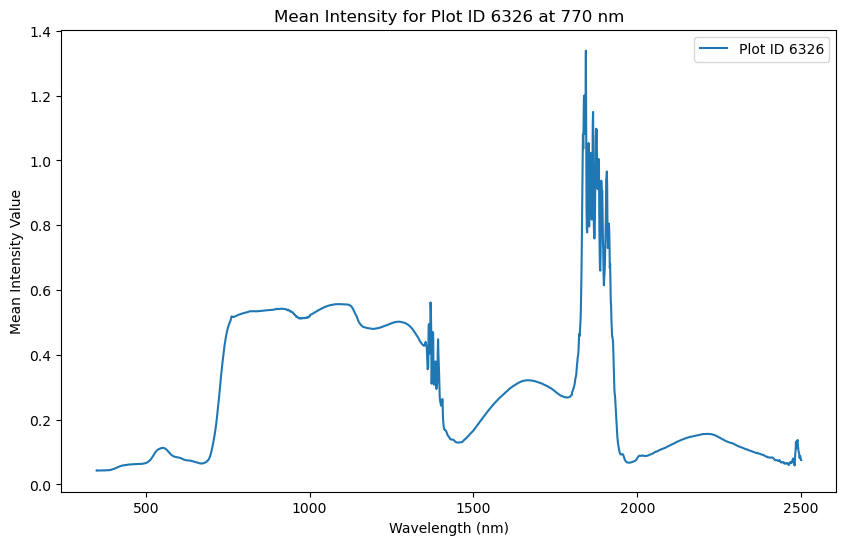

In [31]:
import matplotlib.pyplot as plt

# Assuming df has already been converted to numeric values where necessary

for plot_id, columns in filtered_plot_groups.items():
    # Check if there are any columns left after filtering
    if columns:
        # Calculate the mean across the columns for this plot ID
        mean_values = df[columns].mean(axis=1)

        # Create a new figure for each plot ID
        plt.figure(figsize=(10, 6))

        # Plot the mean values
        plt.plot(df['Wavelength'], mean_values, label=f'Plot ID {plot_id}')  # Use Wavelength for x-axis

        plt.xlabel('Wavelength (nm)')  # x-axis represents wavelength in nanometers
        plt.ylabel('Mean Intensity Value')
        plt.title(f'Mean Intensity for Plot ID {plot_id} (Filtered)')
        plt.legend()

        plt.show()
